In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset

In [2]:
df = pd.read_csv('movies_metadata.csv',low_memory=False)
df1 = pd.read_csv('credits.csv')
df2 = pd.read_csv('keywords.csv')
df4 = pd.read_csv('ratings_small.csv')
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df_mod = df[['adult','genres','id','imdb_id','overview','tagline','title','vote_average','vote_count','release_date']]
df_mod.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_date
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995-10-30
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995-12-15
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995-12-22
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995-12-22
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995-02-10


In [4]:
s = (df_mod['release_date'].iloc[0])
h = int(s[:4])
h

1995

In [5]:
df_mod.isnull().sum()

adult               0
genres              0
id                  0
imdb_id            17
overview          954
tagline         25054
title               6
vote_average        6
vote_count          6
release_date       87
dtype: int64

In [6]:
df_mod.dropna(subset=['release_date', 'imdb_id','title'],inplace=True)
df_mod.head()
df_mod.isnull().sum()

<ipython-input-6-38dd49a297af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod.dropna(subset=['release_date', 'imdb_id','title'],inplace=True)


adult               0
genres              0
id                  0
imdb_id             0
overview          939
tagline         24966
title               0
vote_average        0
vote_count          0
release_date        0
dtype: int64

In [7]:
r,c = df_mod.shape
r

45362

In [8]:
df_mod['release_date'] = [int(s[:4]) for s in df_mod['release_date']]


<ipython-input-8-6c178a9d332a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['release_date'] = [int(s[:4]) for s in df_mod['release_date']]


In [9]:
df_mod.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_date
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995


In [10]:
df_mod = df_mod.rename(columns={'release_date':'release_year'})
df_mod['adult'] = [0 if s == 'False' else 1 for s in df_mod['adult']]

In [11]:
df_mod.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year
0,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995
1,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995
3,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995


In [12]:
df_mod = df_mod[df_mod['release_year'] >= 1960]

In [13]:
df_mod.shape

(39695, 10)

In [14]:
import ast
# s = (df['genres'].iloc[0])
def gen(s):
    ls = ast.literal_eval(s)
    h = ''
    for ele in ls:
        if h == '':
            h = h + ele['name']
        else:
            h = h + ',' + ele['name']
    return h


# print(gen(s))

In [15]:
df_mod['genres'] = [gen(s) for s in df_mod['genres']]

In [16]:
df_mod.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year
0,0,"Animation,Comedy,Family",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995
1,0,"Adventure,Fantasy,Family",8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
2,0,"Romance,Comedy",15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995
3,0,"Comedy,Drama,Romance",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995
4,0,Comedy,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

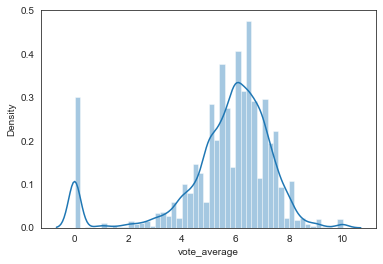

In [17]:
sns.distplot(df_mod['vote_average'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_count', ylabel='Density'>

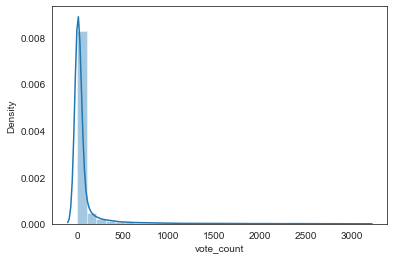

In [18]:
sns.distplot(df_mod['vote_count'][df_mod['vote_count']<=3124],bins=30)

In [19]:
df_mod['vote_count'].describe(percentiles=[0.25,0.75,0.95]).round(2)

count    39695.00
mean       122.87
std        523.27
min          0.00
25%          4.00
50%         11.00
75%         40.00
95%        511.00
max      14075.00
Name: vote_count, dtype: float64

In [20]:
df_mod['vote_average'].describe(percentiles=[0.25,0.75,0.95]).round(2)

count    39695.00
mean         5.64
std          1.88
min          0.00
25%          5.00
50%          6.00
75%          6.80
95%          7.80
max         10.00
Name: vote_average, dtype: float64

In [21]:
df_mod.corr()

,adult,vote_average,vote_count,release_year
adult,1.000000,-0.012777,-0.003103,0.000852
vote_average,-0.012777,1.000000,0.128978,0.007709
vote_count,-0.003103,0.128978,1.000000,0.088935
release_year,0.000852,0.007709,0.088935,1.000000


In [24]:
df_mod = df_mod[(df_mod['vote_count']>=122) & (df_mod['vote_average']>=5.64)]
df_mod.shape

(4275, 10)

In [25]:
df_mod.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year
0,0,"Animation,Comedy,Family",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995
1,0,"Adventure,Fantasy,Family",8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
4,0,Comedy,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995
5,0,"Action,Crime,Drama,Thriller",949,tt0113277,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,1995
6,0,"Comedy,Romance",11860,tt0114319,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995


In [28]:
df_mod.index = df_mod['imdb_id']
df_mod.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year
imdb_id,,,,,,,,,,
tt0114709,0,"Animation,Comedy,Family",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995
tt0113497,0,"Adventure,Fantasy,Family",8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
tt0113041,0,Comedy,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995
tt0113277,0,"Action,Crime,Drama,Thriller",949,tt0113277,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,1995
tt0114319,0,"Comedy,Romance",11860,tt0114319,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995


In [29]:
df_mod['genres'] = [genre.replace(',', ' ') for genre in df_mod['genres']]

In [30]:
df_mod.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year
imdb_id,,,,,,,,,,
tt0114709,0,Animation Comedy Family,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995
tt0113497,0,Adventure Fantasy Family,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
tt0113041,0,Comedy,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995
tt0113277,0,Action Crime Drama Thriller,949,tt0113277,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,1995
tt0114319,0,Comedy Romance,11860,tt0114319,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995


In [31]:
df_mod['imdb_url']=df_mod['imdb_id'].apply(lambda titleId: f'https://www.imdb.com/title/{titleId}/')

In [32]:
df_mod.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year,imdb_url
imdb_id,,,,,,,,,,,
tt0114709,0,Animation Comedy Family,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995,https://www.imdb.com/title/tt0114709/
tt0113497,0,Adventure Fantasy Family,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,https://www.imdb.com/title/tt0113497/
tt0113041,0,Comedy,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,https://www.imdb.com/title/tt0113041/
tt0113277,0,Action Crime Drama Thriller,949,tt0113277,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,1995,https://www.imdb.com/title/tt0113277/
tt0114319,0,Comedy Romance,11860,tt0114319,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995,https://www.imdb.com/title/tt0114319/


In [33]:
df_mod.reset_index(drop=True, inplace=True)

In [34]:
df_mod.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year,imdb_url
0,0,Animation Comedy Family,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995,https://www.imdb.com/title/tt0114709/
1,0,Adventure Fantasy Family,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,https://www.imdb.com/title/tt0113497/
2,0,Comedy,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,https://www.imdb.com/title/tt0113041/
3,0,Action Crime Drama Thriller,949,tt0113277,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,1995,https://www.imdb.com/title/tt0113277/
4,0,Comedy Romance,11860,tt0114319,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995,https://www.imdb.com/title/tt0114319/


In [35]:
df_mod.to_csv('movies.csv', index=False)

In [36]:
movies_df = pd.read_csv('movies.csv')

In [37]:
movies_df.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year,imdb_url
0,0,Animation Comedy Family,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995,https://www.imdb.com/title/tt0114709/
1,0,Adventure Fantasy Family,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,https://www.imdb.com/title/tt0113497/
2,0,Comedy,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,https://www.imdb.com/title/tt0113041/
3,0,Action Crime Drama Thriller,949,tt0113277,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,1995,https://www.imdb.com/title/tt0113277/
4,0,Comedy Romance,11860,tt0114319,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995,https://www.imdb.com/title/tt0114319/


In [46]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: np.nan if x == '\\N' else x)
movies_df = movies_df[movies_df['genres'].notna()]
movies_df.reset_index(drop=True,inplace=True)
movies_df.head()

,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year,imdb_url
0,0,Animation Comedy Family,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995,https://www.imdb.com/title/tt0114709/
1,0,Adventure Fantasy Family,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,https://www.imdb.com/title/tt0113497/
2,0,Comedy,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,https://www.imdb.com/title/tt0113041/
3,0,Action Crime Drama Thriller,949,tt0113277,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,1995,https://www.imdb.com/title/tt0113277/
4,0,Comedy Romance,11860,tt0114319,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995,https://www.imdb.com/title/tt0114319/


In [47]:
movies_df.isnull().sum()

adult             0
genres            0
id                0
imdb_id           0
overview          6
tagline         583
title             0
vote_average      0
vote_count        0
release_year      0
imdb_url          0
dtype: int64

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
cv = CountVectorizer(dtype=np.uint8)
dtm = cv.fit_transform(movies_df['genres']).toarray()
dtm.shape

(4274, 21)

In [50]:
new_matrix = np.concatenate((dtm, np.array(movies_df['vote_average']).reshape(-1,1)),axis=1)

In [51]:
MMS = MinMaxScaler()
numVotes = np.array(movies_df['vote_count'])
numVotes = numVotes.reshape(-1,1)
numVotes = MMS.fit_transform(numVotes)
new_matrix = np.concatenate((new_matrix,numVotes),axis=1)

In [69]:
similarities = cosine_similarity(new_matrix,dense_output=False)
similarities.shape

(4274, 4274)

In [98]:
movies_df.reset_index()

,index,adult,genres,id,imdb_id,overview,tagline,title,vote_average,vote_count,release_year,imdb_url
0,0,0,Animation Comedy Family,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0,1995,https://www.imdb.com/title/tt0114709/
1,1,0,Adventure Fantasy Family,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,https://www.imdb.com/title/tt0113497/
2,2,0,Comedy,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,https://www.imdb.com/title/tt0113041/
3,3,0,Action Crime Drama Thriller,949,tt0113277,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,1995,https://www.imdb.com/title/tt0113277/
4,4,0,Comedy Romance,11860,tt0114319,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995,https://www.imdb.com/title/tt0114319/
...,...,...,...,...,...,...,...,...,...,...,...,...
4269,4269,0,Drama Crime Thriller,339692,tt4633690,A newly-released prison gangster is forced by ...,Some criminals are made in prison,Shot Caller,6.9,324.0,2017,https://www.imdb.com/title/tt4633690/
4270,4270,0,Comedy,417870,tt3564472,Four girlfriends take a trip to New Orleans fo...,"""Forgive us in advance for this wild weekend""",Girls Trip,7.1,393.0,2017,https://www.imdb.com/title/tt3564472/
4271,4271,0,TV Movie Family Action Comedy Music Adventure,417320,tt5117876,When the pressure to be royal becomes too much...,Long live evil.,Descendants 2,7.5,171.0,2017,https://www.imdb.com/title/tt5117876/
4272,4272,0,Comedy Drama,265189,tt2121382,"While holidaying in the French Alps, a Swedish...",NaN,Force Majeure,6.8,255.0,2014,https://www.imdb.com/title/tt2121382/


In [157]:
# list_of_all_titles = movies_df['title'].tolist()
# find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
# close_match = find_close_match[0]
# print(close_match)
# index_of_the_movie = movies_df[movies_df['title']==close_match].index.values
# print(index_of_the_movie[0])
# similarity_score = list(enumerate(similarities[index_of_the_movie[0]]))
# sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 


In [158]:
# print('Movies suggested for you : \n')

# i = 1

# for movie in sorted_similar_movies:
#   index = movie[0]
#   title_from_index = movies_df[movies_df.index==index]['title'].values[0]
#   if (i<30):
#     print(i, '.',title_from_index)
#     i+=1

In [160]:
import difflib
movie_name = input(' Enter your favourite movie name : ')
def recommendation_list(title):
    list_of_all_titles = movies_df['title'].tolist()
    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
    close_match = find_close_match[0]
    #print(close_match)
    index_of_the_movie = movies_df[movies_df['title']==close_match].index.values
    #print(index_of_the_movie[0])
    similarity_score = list(enumerate(similarities[index_of_the_movie[0]]))
    sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
    #print('Movies suggested for you : \n')
    i = 1
    mov = []
    for movie in sorted_similar_movies:
      index = movie[0]
      title_from_index = movies_df[movies_df.index==index]['title'].values[0]
      if (i<12):
        mov.append(title_from_index)
        i+=1
    return mov

 Enter your favourite movie name : mad max fury road


In [161]:
def recommend(title):
    try:
        mov = recommendation_list(title)
        print('Movies suggested for you ' + mov[0] + ':'+ '\n')
        for i in range(11):
            if(i == 0):
                continue
            print(i, '.',mov[i])
    except:
        return None

In [162]:
recommendation_list(movie_name)

['Mad Max: Fury Road',
 'Jurassic World',
 'X2',
 'The Matrix Reloaded',
 'X-Men Origins: Wolverine',
 'X-Men: The Last Stand',
 'The Matrix Revolutions',
 'Predator',
 'Armageddon',
 'Starship Troopers',
 'Serenity']

In [163]:
recommend(movie_name)

Movies suggested for you Mad Max: Fury Road:

1 . Jurassic World
2 . X2
3 . The Matrix Reloaded
4 . X-Men Origins: Wolverine
5 . X-Men: The Last Stand
6 . The Matrix Revolutions
7 . Predator
8 . Armageddon
9 . Starship Troopers
10 . Serenity
